In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result

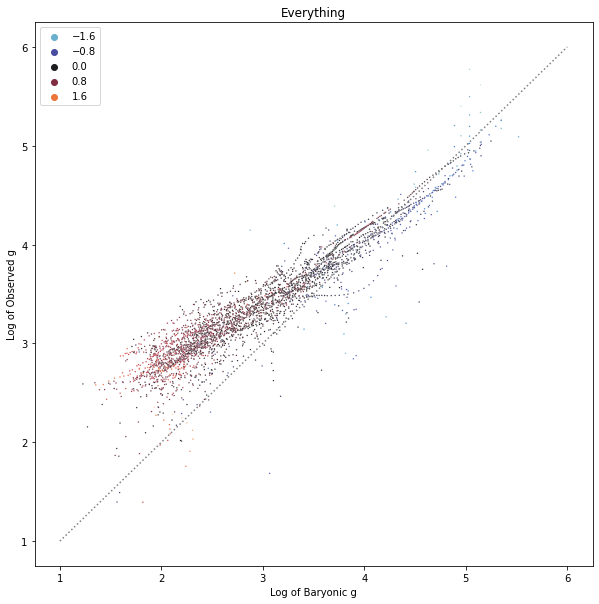

In [2]:
standard = Result(load_sparc(namespace='sparc_standard'))
g = standard.plot_rar()